# Tarea N°1 - Máquinas de Aprendizaje - ILI393
### Martín Villanueva A.

## Introducción

En es primera tarea, se tiene como objetivo la implementación y testeo de algoritmos para regresión lineal y regresión logística. En ambos casos la busqueda de  los mejores parámetros del modelo se realiza por medio de 	_Gradiente Descendente_ (batch y online) y _Newton-Raphson_. Para la correcta selección de los _hiperparámetros_ se realiza 5-fold crossvalidation, intentando de este modo que los modelos resultantes no caigan en problemas de _overfitting_.

## Parte 1 - Regresión Lineal

In [29]:
#alphas to try on raw data
alphas1 = np.linspace(4.0e-7, 4.5e-7, 5, endpoint=True)
#alphas to try on rescaled and normalized data
alphas2 = np.array([1.0e-3, 0.8e-3, 0.6e-3, 0.4e-3, 0.2e-3])

### 1a) Gradiente Descendente Batch 

### Raw data

##############################################################
Dataset: 0
Best alpha: 4.5e-07


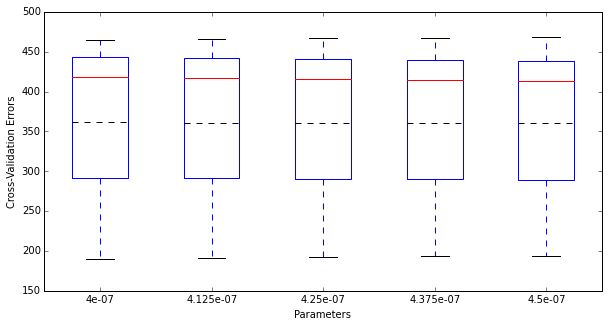

Training error: 291.529613576
Testing error: 224.340517783
N° iterations: 64
Beta: [ 0.00759594  0.25955161  0.02174389 -0.0171124  -0.01772088  0.01810715
  0.13438221 -0.04736688  0.12759068 -0.03385616  0.01151583  0.0052043
  0.0076039 ]
##############################################################


##############################################################
Dataset: 14
Best alpha: 4.5e-07


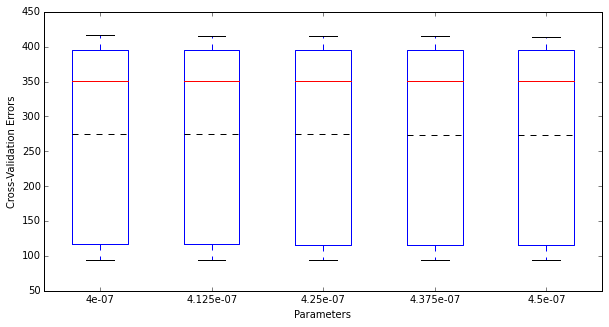

Training error: 236.271311927
Testing error: 424.701874
N° iterations: 53
Beta: [ 0.00555882  0.25899926  0.02076567 -0.00916217 -0.00514845  0.00739162
  0.10491754 -0.03100194  0.1036039   0.02771736  0.01037837  0.00402665
  0.0064281 ]
##############################################################




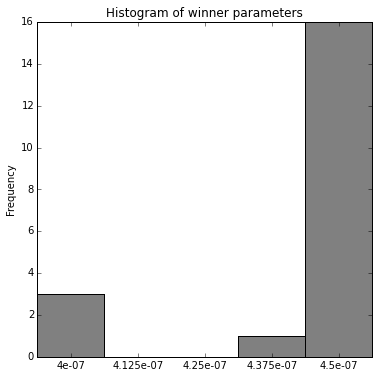

In [42]:
solve_regression(gd_batch, 'linear', params=alphas1, show=[0,14])

### Rescaled data

##############################################################
Dataset: 0
Best alpha: 0.001


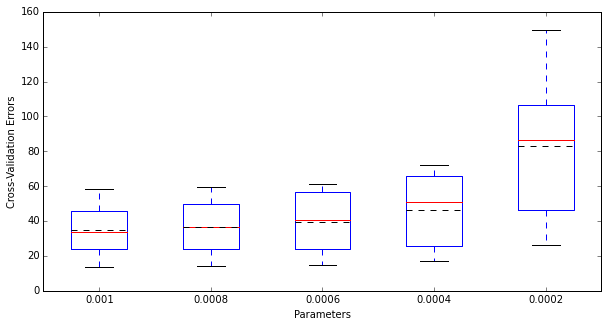

Training error: 20.6182739329
Testing error: 42.5328851194
N° iterations: 530
Beta: [ 39.27502848 -13.60536851  17.88310933 -16.95659792 -13.32113539
  21.00349746  14.26238428 -17.86462666  10.29693403 -11.62685618
   3.58148223   4.97282493  18.67876439]
##############################################################


##############################################################
Dataset: 14
Best alpha: 0.001


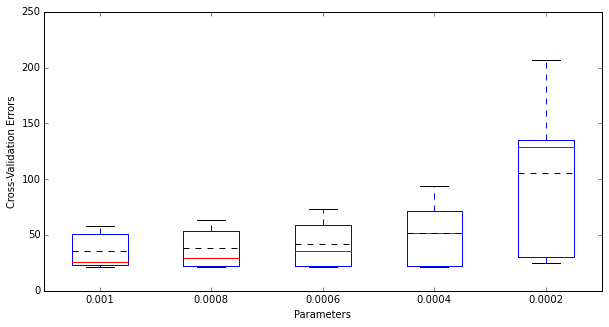

Training error: 21.9788628555
Testing error: 91.1000283764
N° iterations: 548
Beta: [ 31.86746216 -11.73989936  18.4682303  -15.58587584 -10.42352654
  16.69472148  16.37413566 -14.74326499   7.4469539   -7.23761563
   4.18365522   3.54434565  18.06400087]
##############################################################




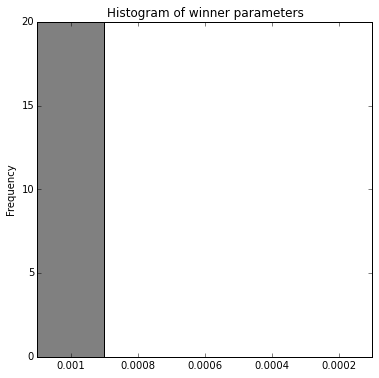

In [44]:
solve_regression(gd_batch, 'linear', params=alphas2, data_func=rescale, show=[0,14])

### Normalized data

##############################################################
Dataset: 0
Best alpha: 0.001


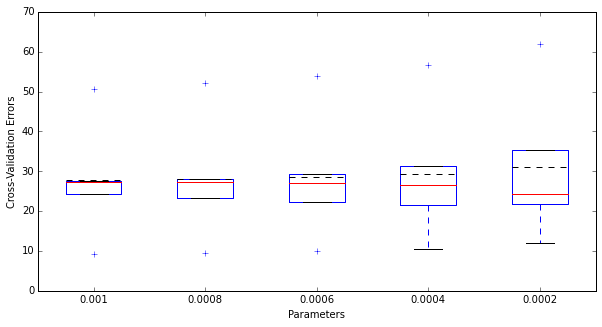

Training error: 13.4194733738
Testing error: 36.5826804086
N° iterations: 137
Beta: [ 42.22626947  -4.02131789   4.23055468  -3.50410785  -3.8804333
   6.72285551   3.1979057   -4.13343304  -0.61328431  -3.02687997
   1.98386787   1.43159348   3.59464352]
##############################################################


##############################################################
Dataset: 14
Best alpha: 0.001


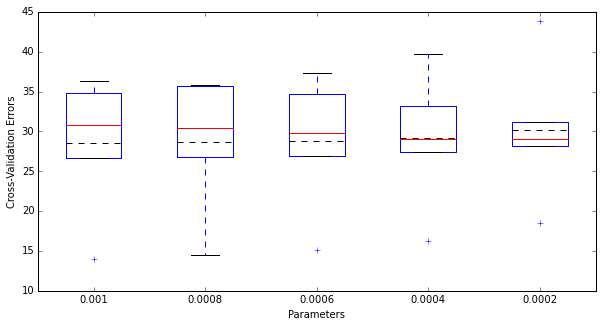

Training error: 16.3098751254
Testing error: 65.7517896491
N° iterations: 96
Beta: [ 40.87319656  -3.87689122   4.66900552  -3.56542152  -3.20285147
   5.02062112   2.99775041  -3.08497395   0.46571746  -1.71364208
   1.8960333    1.21081326   3.61273617]
##############################################################




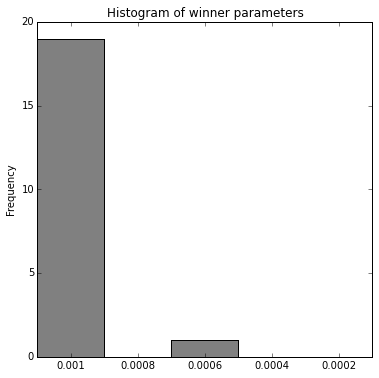

In [45]:
solve_regression(gd_batch, 'linear', params=alphas2, data_func=normalize, show=[0,14])

### 1b) Gradiente Descendente Online

### Raw data

##############################################################
Dataset: 0
Best alpha: 4.5e-07


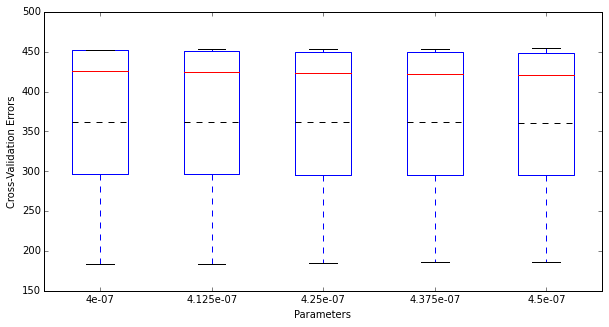

Training error: 292.641332227
Testing error: 216.286212008
N° iterations: 66
Beta: [ 0.00777387  0.26225985  0.0228718  -0.01769797 -0.01559905  0.0187834
  0.13911965 -0.05018793  0.13196834 -0.03041284  0.01187493  0.00535709
  0.00780838]
##############################################################


##############################################################
Dataset: 14
Best alpha: 4.5e-07


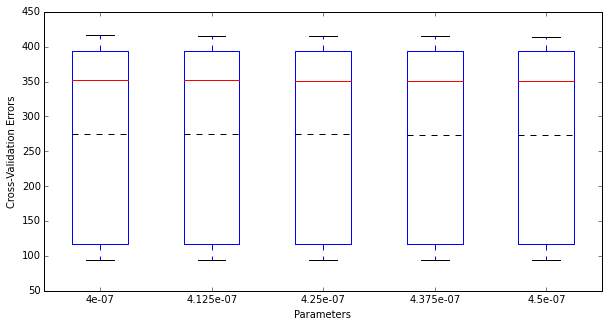

Training error: 236.224475078
Testing error: 425.608168754
N° iterations: 54
Beta: [ 0.0056634   0.25890305  0.02099604 -0.00953796 -0.00318058  0.00795135
  0.10658788 -0.03180157  0.10336748  0.02722773  0.01067373  0.00410388
  0.00649339]
##############################################################




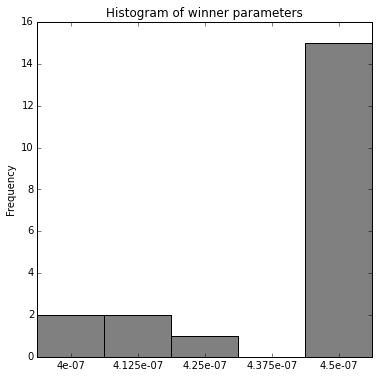

In [46]:
solve_regression(gd_online, 'linear', params=alphas1, show=[0,14])

### Rescaled data

##############################################################
Dataset: 0
Best alpha: 0.001


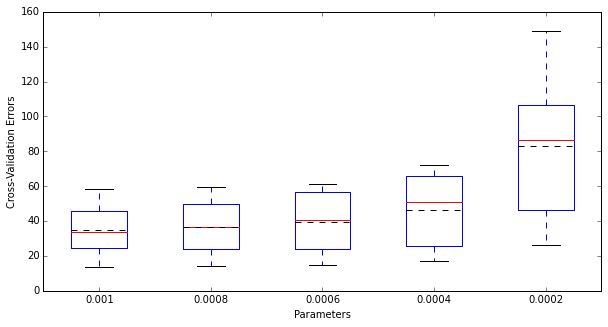

Training error: 20.6132205513
Testing error: 42.5978431746
N° iterations: 531
Beta: [ 39.25933591 -13.60674956  17.89442223 -16.95968836 -13.34024487
  21.02057345  14.28707965 -17.853764    10.30068558 -11.61868158
   3.58670305   4.99221433  18.68272861]
##############################################################


##############################################################
Dataset: 14
Best alpha: 0.001


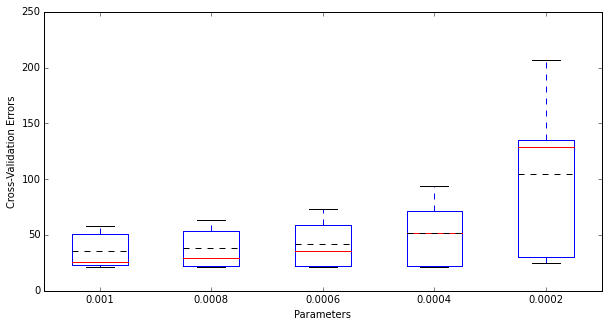

Training error: 21.9786834767
Testing error: 90.8722318343
N° iterations: 548
Beta: [ 31.87057958 -11.74525815  18.46781379 -15.57800553 -10.41308722
  16.7220343   16.37303632 -14.73147343   7.43757436  -7.23999133
   4.19564227   3.56494144  18.04271745]
##############################################################




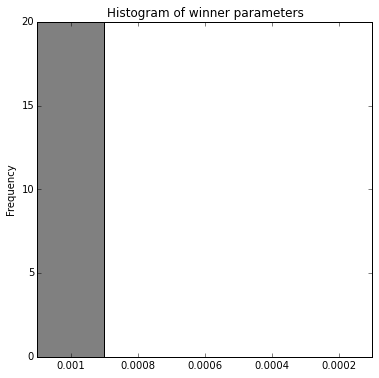

In [47]:
solve_regression(gd_online, 'linear', params=alphas2, data_func=rescale, show=[0,14])

### Normalized data

##############################################################
Dataset: 0
Best alpha: 0.001


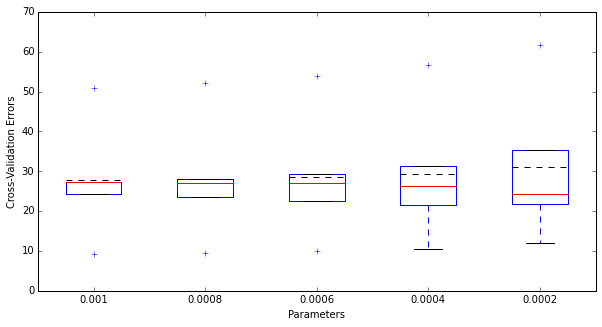

Training error: 13.4160931261
Testing error: 36.4127700422
N° iterations: 137
Beta: [ 42.22489559  -4.01812148   4.22806184  -3.50756328  -3.86158705
   6.74149223   3.19810492  -4.11134324  -0.61343112  -3.0115829
   1.97701226   1.44230261   3.57298429]
##############################################################


##############################################################
Dataset: 14
Best alpha: 0.001


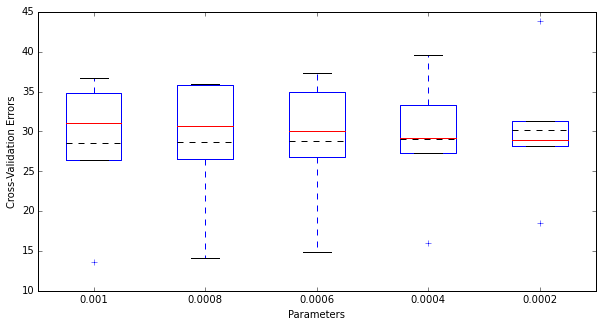

Training error: 16.3153752729
Testing error: 65.4658388653
N° iterations: 95
Beta: [ 40.88418912  -3.86109769   4.6767013   -3.52334001  -3.23350274
   5.05247161   3.00863291  -3.07361825   0.48458418  -1.72351009
   1.90061769   1.19267068   3.59741601]
##############################################################




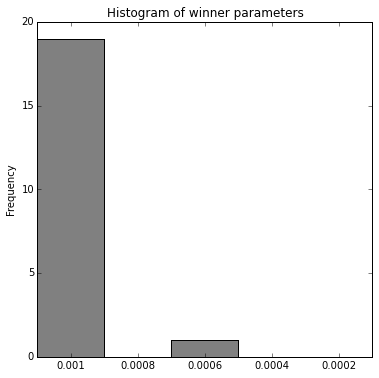

In [48]:
solve_regression(gd_online, 'linear', params=alphas2, data_func=normalize, show=[0,14])

### 1c) Newton Raphson

### Raw data

In [33]:
solve_regression(nr_linear, 'linear', show=[0,14])

##############################################################
Dataset: 0
Training error: 12.690235978
Testing error: 29.8692128464
N° iterations: 2
Beta: [ 27.77312374  -0.19196441   3.64271996  -2.61978866  -0.04940511
   3.27558724   0.8950743   -0.94639251  -0.03448292  -0.13677948
   2.89862662  12.4397042   13.71043458]
##############################################################


##############################################################
Dataset: 14
Training error: 15.5168045543
Testing error: 22.256882111
N° iterations: 2
Beta: [  2.92044009e+01  -2.45567403e-01   3.72846884e+00  -2.50624227e+00
  -3.72800837e-02   2.92327199e+00   8.33168001e-01  -6.98788024e-01
  -1.71242668e-02  -1.04831696e-01   2.76379484e+00   1.24136911e+01
   1.31720844e+01]
##############################################################




### Rescaled data

In [35]:
solve_regression(nr_linear, 'linear', data_func=rescale, show=[0,14])

##############################################################
Dataset: 0
Training error: 12.690235978
Testing error: 70.8230012379
N° iterations: 2
Beta: [ 37.68776506 -21.30804932  18.21359978 -15.71873198 -15.80963497
  45.85822131  16.11133741 -17.03506525 -10.86211949 -13.67794787
   5.79725325  12.4397042   24.27432442]
##############################################################


##############################################################
Dataset: 14
Training error: 15.5168045543
Testing error: 153.683962628
N° iterations: 2
Beta: [ 32.95912586 -27.25798171  18.64234419 -15.03745362 -11.92962679
  29.23271995  18.32969603 -12.57818444  -5.37701976 -10.48316963
   5.52758969  12.41369113  23.32117544]
##############################################################




### Normalized data

In [36]:
solve_regression(nr_linear, 'linear', data_func=normalize, show=[0,14])

##############################################################
Dataset: 0
Training error: 12.690235978
Testing error: 39.1167896725
N° iterations: 2
Beta: [ 42.22724     -3.99216233   4.26196505  -3.44486437  -3.93375017
   8.28671753   3.23536861  -4.20056151  -2.37742955  -3.2700182
   2.44555845   1.89445678   3.72993749]
##############################################################


##############################################################
Dataset: 14
Training error: 15.5168045543
Testing error: 61.1820073443
N° iterations: 2
Beta: [ 40.89617333  -4.54027498   4.63264649  -3.14293395  -2.94434592
   6.47945038   3.19280105  -3.05719739  -1.09358413  -2.01526648
   2.3439993    1.82778689   3.80201253]
##############################################################




### 2a) Gradiente Descendente Batch

<img src='1.png' style="width: 850px;">

### 2b) Gradiente Descendente Online

<img src='2.png' style="width: 850px;">

### 2c) Newton Raphson

<img src='3.png' style="width: 850px;">

### 3) Locally weighted linear regression

In [49]:
taus1 = np.linspace(30.,200.,5, endpoint=True)
taus2 = np.linspace(1.,10.,5, endpoint=True)

### Raw data

##############################################################
Dataset: 0
Best tau: 30.0


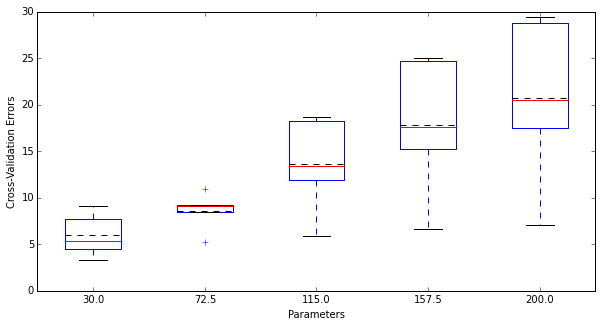

Training error (weighted): 0.185160073025
Testing error (weighted): 9.27828692439
Training error: 240.503072277
Testing error: 332.258498635
##############################################################


##############################################################
Dataset: 14
Best tau: 30.0


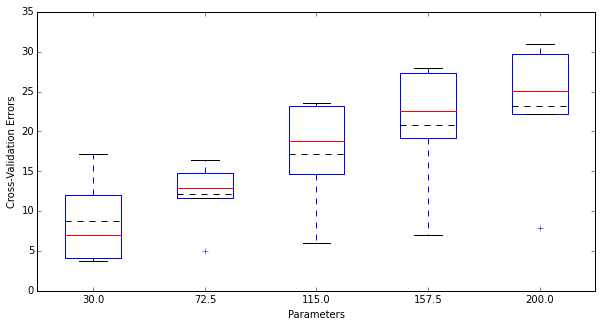

Training error (weighted): 0.26539563072
Testing error (weighted): 2.51726674875
Training error: 99.4681361427
Testing error: 136.928680467
##############################################################




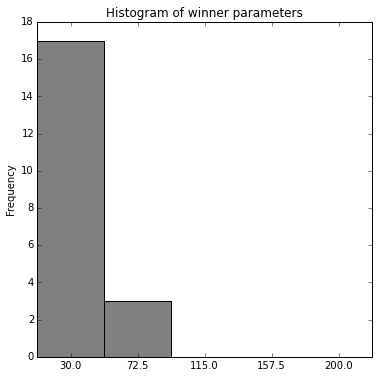

In [57]:
solve_weighted(taus1, show=[0,14])

### Rescaled data

##############################################################
Dataset: 0
Best tau: 1.0


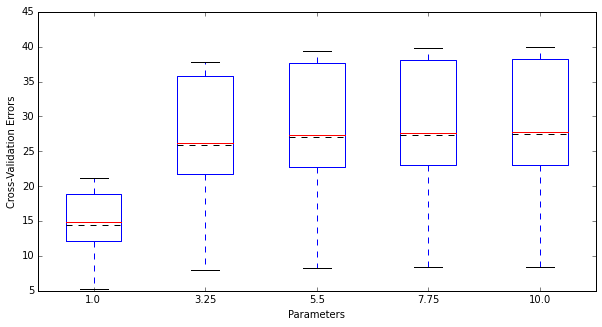

Training error (weighted): 5.8374635318
Testing error (weighted): 34.5095818121
Training error: 12.9492812413
Testing error: 70.2835184179
##############################################################


##############################################################
Dataset: 14
Best tau: 1.0


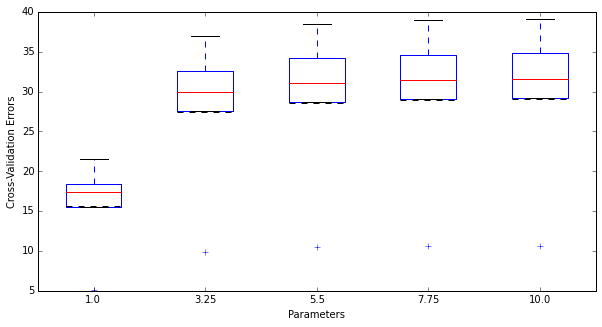

Training error (weighted): 6.62249985344
Testing error (weighted): 66.2273010366
Training error: 16.0705146463
Testing error: 159.675444498
##############################################################




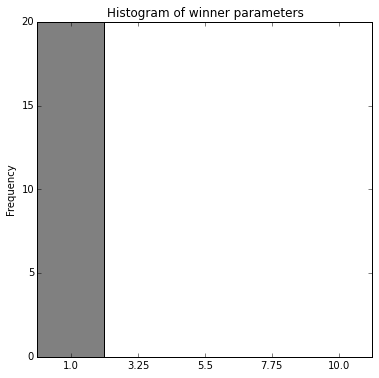

In [58]:
solve_weighted(taus2, data_func=rescale, show=[0,14])

### Normalized data

##############################################################
Dataset: 0
Best tau: 1.0


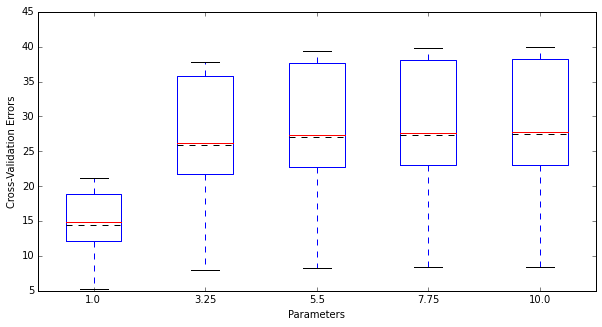

Training error (weighted): 5.8374635318
Testing error (weighted): 34.5095818121
Training error: 12.9492812413
Testing error: 70.2835184179
##############################################################


##############################################################
Dataset: 14
Best tau: 1.0


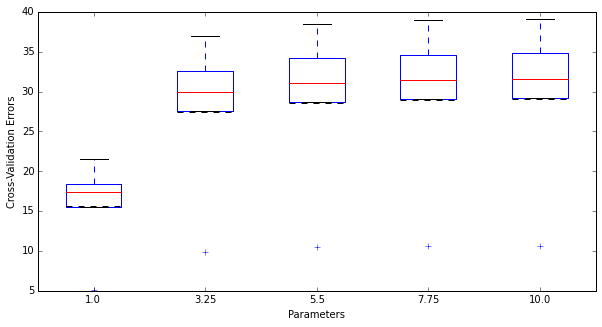

Training error (weighted): 6.62249985344
Testing error (weighted): 66.2273010366
Training error: 16.0705146463
Testing error: 159.675444498
##############################################################




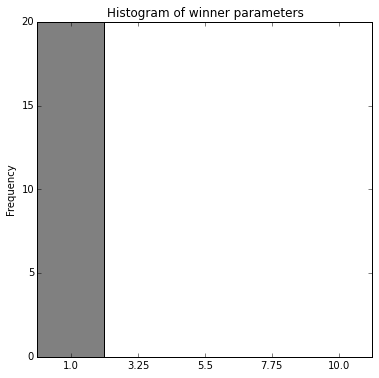

In [59]:
solve_weighted(taus2, data_func=rescale, show=[0,14])

### 4)

<img src='4.png' style="width: 850px;">

### 5) 

## Parte 2 - Regresión Logística

### 1a) Gradiente ascendente online

In [61]:
#alphas to try on ascent gradient stochastic 
alphas3 = np.linspace(1e-2, 1e-3, 5, endpoint=True)

### Raw data

##############################################################
Dataset: 0
Best alpha: 0.00775


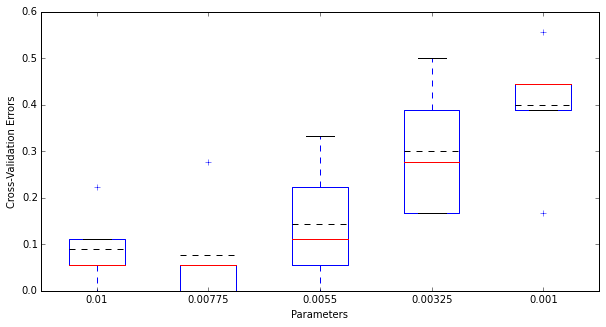

Training error: 0.0444444444444
Testing error: 0.0666666666667
N° iterations: 13625
Beta: [ -6.07258811e+00   7.03329870e+00  -8.26724873e+00  -2.25430210e-01
   1.24680827e+02  -2.80636719e+02   3.07024050e+00]
##############################################################


##############################################################
Dataset: 14
Best alpha: 0.0055


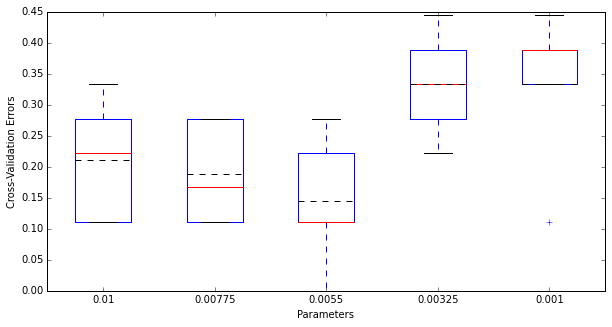

Training error: 0.155555555556
Testing error: 0.166666666667
N° iterations: 100000
Beta: [  85.582449      5.51768624   -6.92887744    0.90383805  137.34901635
 -394.48396529    0.9807746 ]
##############################################################




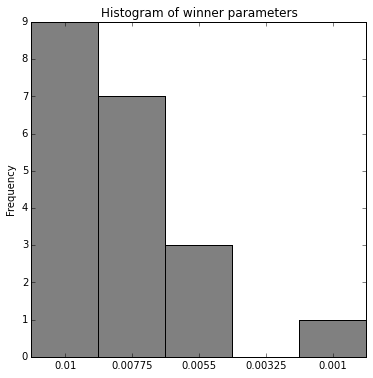

In [73]:
solve_regression(gd_stochastic, 'logistic', params=alphas3, show=[0,14])

### Rescaled data

##############################################################
Dataset: 0
Best alpha: 0.01


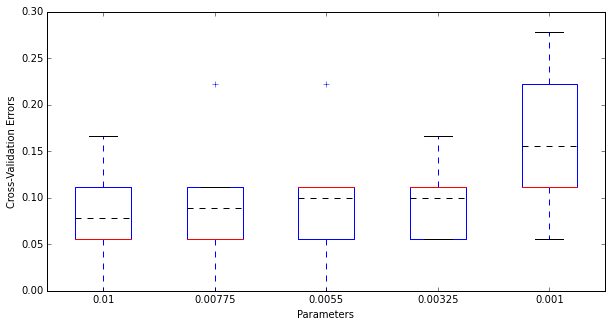

Training error: 0.0666666666667
Testing error: 0.1
N° iterations: 364
Beta: [-0.89067992  1.89240682 -3.06533656 -0.49413702  8.38805164 -3.67234941
  1.39561496]
##############################################################


##############################################################
Dataset: 14
Best alpha: 0.01


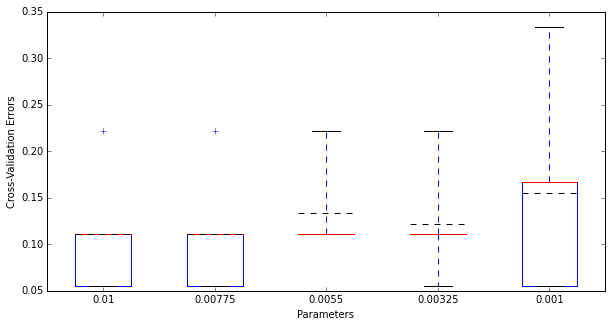

Training error: 0.0888888888889
Testing error: 0.1
N° iterations: 341
Beta: [-0.86739457  2.20861945 -2.52849556 -0.58885793  8.37423558 -3.46780645
  0.54455779]
##############################################################




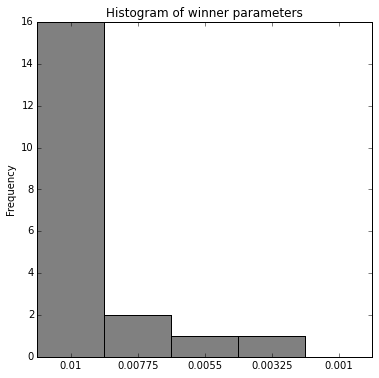

In [71]:
solve_regression(gd_stochastic, 'logistic', params=alphas3, data_func=rescale, show=[0,14])

### Normalized data

##############################################################
Dataset: 0
Best alpha: 0.00325


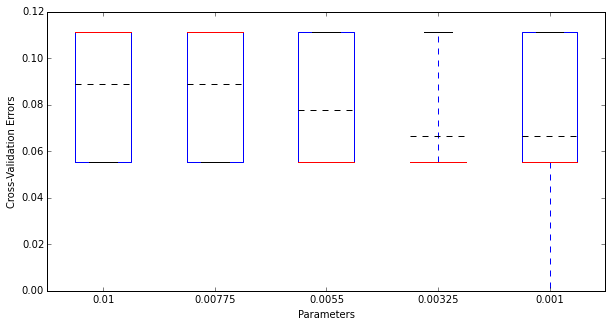

Training error: 0.0222222222222
Testing error: 0.0333333333333
N° iterations: 345
Beta: [-0.2385682   0.81850858 -1.27981156 -0.11349321  3.88872458 -2.76731914
  0.40282272]
##############################################################


##############################################################
Dataset: 14
Best alpha: 0.0055


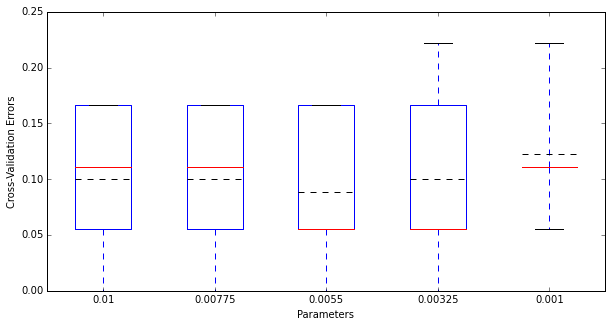

Training error: 0.0444444444444
Testing error: 0.0666666666667
N° iterations: 290
Beta: [ 0.20829953  1.02332025 -1.47941872 -0.31923802  4.65487619 -3.11664099
  0.09574176]
##############################################################




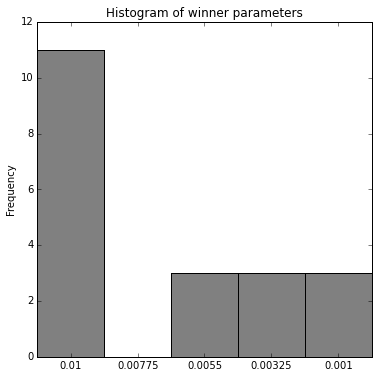

In [72]:
solve_regression(gd_stochastic, 'logistic', params=alphas3, data_func=normalize, show=[0,14])

### 1b) Newton Raphson

### Raw data

In [67]:
solve_regression(nr_logistic, 'logistic', data_func=normalize, show=[0,14])

##############################################################
Dataset: 0
Training error: 0.0
Testing error: 0.0333333333333
N° iterations: 17
Beta: [ -10.17632429   51.90495222 -223.06462833  -72.5822921   446.92953071
 -290.39247559    5.29862312]
##############################################################


##############################################################
Dataset: 14
Training error: 0.0222222222222
Testing error: 0.0333333333333
N° iterations: 14
Beta: [   6.21575176   18.14870684 -124.70691036  -40.65161461  235.09789749
 -145.40751338   -3.76500934]
##############################################################




### Rescaled data

In [69]:
solve_regression(nr_logistic, 'logistic', data_func=rescale, show=[0,14])

##############################################################
Dataset: 0
Training error: 0.0
Testing error: 0.1
N° iterations: 17
Beta: [   73.98701993   180.88595375  -814.87368456  -183.34781483  1865.9231994
  -602.60602669    22.16612173]
##############################################################


##############################################################
Dataset: 14
Training error: 0.0222222222222
Testing error: 0.133333333333
N° iterations: 14
Beta: [  66.60527006   62.6697612  -440.52106091  -98.52834405  948.8637574
 -296.81184378  -17.07077338]
##############################################################




### Normalized data

In [70]:
solve_regression(nr_logistic, 'logistic', data_func=normalize, show=[0,14])

##############################################################
Dataset: 0
Training error: 0.0
Testing error: 0.0333333333333
N° iterations: 17
Beta: [ -10.17632429   51.90495222 -223.06462833  -72.5822921   446.92953071
 -290.39247559    5.29862312]
##############################################################


##############################################################
Dataset: 14
Training error: 0.0222222222222
Testing error: 0.0333333333333
N° iterations: 14
Beta: [   6.21575176   18.14870684 -124.70691036  -40.65161461  235.09789749
 -145.40751338   -3.76500934]
##############################################################




### 2a) Gradiente Ascendente Online

<img src='5.png' style="width: 850px;">

### 2b) Newton Raphson

<img src='6.png' style="width: 850px;">

### 3)

## Conclusiones

## Anexos

En la siguiente sección se encuentra todo el código necesario para reproducir cada uno de los resultados mostrados anteriormente. Para poder ejecutar el código en el informe, se debe en primer lugar ejecutar las celdas de código presentes en este anexo.

### Configuración del notebook

In [17]:
#notebook settings
%matplotlib inline

#import some useful libraries and utilities
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold
from sklearn.cross_validation import KFold

#avoid numpy warning (they are handled correctly)
np.seterr('ignore')

#setting some paths
path1 = './cereales/'
#data directory
path2 = './credit/'

### Métricas de error para regresión lineal

In [18]:
#overall cost function for linear regresion
def J(X, y, beta):
    f = np.dot(X,beta)
    diff = f-y
    return 0.5*np.dot(diff,diff)

#mean squared error for linear regression 
def mse(X, y, beta):
    M,_ = X.shape
    f = np.dot(X,beta)
    diff = f-y
    return (1./(M-1))*np.dot(diff,diff)

### Implementación de algoritmos de regresión lineal

In [32]:
#batch gradient descent for linear regression
def gd_batch(X, y, alpha, eps=1e-3, max_iter=100000):
    M,N = X.shape
    beta = np.zeros(N)
    J1 = J(X,y,beta)
    for i in xrange(max_iter):
        J0 = J1
        f = np.dot(X,beta)
        dJ = np.dot(X.T,f-y)
        beta -= alpha*dJ
        J1 = J(X,y,beta)
        if np.abs(J1-J0)/J0 < eps:
            break
    return (beta,i+1)

#online gradient descent for linear regression
def gd_online(X, y, alpha, eps=1e-3, max_iter=100000):
    M,N = X.shape
    beta = np.zeros(N)
    J1 = J(X,y,beta)
    for i in xrange(max_iter):
        J0 = J1
        for m in xrange(M):
            beta -= alpha*(np.dot(X[m],beta)-y[m])*X[m]
        J1 = J(X,y,beta)
        if np.abs(J1-J0)/J0 < eps: break
    return (beta,i+1)

#Newton-Raphson method for linear regression
def nr_linear(X, y, eps=1e-5, max_iter=100000):
    M,N = X.shape
    beta = np.zeros(N)
    J1 = J(X,y,beta)
    Hess = np.dot(X.T,X)
    for i in xrange(max_iter):
        J0 = J1
        f = np.dot(X,beta)
        dJ = np.dot(X.T,f-y)
        beta -= np.linalg.solve(Hess, dJ)
        J1 = J(X,y,beta)
        if np.abs(J1-J0)/J0 < eps: break
    return (beta,i+1)

** Comentarios de implementación:**
* Para todos los algoritmos existen básicamente dos criterios de salida. El primero es
    cuando el error relativo es menor a _eps_, vale decir, cuando la función de error esta
	cambiando muy poco de iteración en iteración. El segundo es el número máximo de iteraciones, mas
	que nada para detener algoritmos que no pueden cumplir con el criterio del error (learning rates muy
	altos por ejemplo).
* Todos los _starting guest_ son el vector zeros. Esto para reproducir y comparar resultados
	de manera adecuada.
* En vez de invertir la matriz Hessiana en Newton-Raphson, se opta por resolver el sistema lineal
	asociado, por razones de estabilidad numérica.

### Implementación de locally weighted linear regression

In [53]:
#compute weights for all samples in X matrix, respect to x0
def weight(X, x0, tau):
    Diff = X - x0
    Diff *= Diff
    return np.exp(-1*np.sum(Diff,axis=1)/(2.*tau**2))

#weighted cost function
def wJ(X, y, beta, w):
    f = np.dot(X,beta)
    diff = f-y
    diff **=2
    return 0.5*np.dot(w,diff)

#weighted mean squared error
def wmse(X, y, beta, w):
    M,_ = X.shape
    f = np.dot(X,beta)
    diff = f-y
    diff **=2
    return (1./(M-1))*np.dot(w,diff)

#find best beta for locally weighted linear regression
def min_weighted(X, y, w):
    W = np.diag(w)
    M = np.dot(X.T, np.dot(W, X))
    b = np.dot(X.T, np.dot(W, y))
    return np.linalg.solve(M,b)

### Métricas de error para regresión logística

In [20]:
#log likelihood function for logistic regression
"""
Computing l this way, make it more stable numerically (no overflows en exp)
"""
def l(X, y, beta):
    y1_mask = y.astype(bool)
    y0_mask = np.logical_not(y1_mask)
    f = sigmoid(np.dot(X,beta))
    return (np.log(f[y1_mask])).sum() + (np.log(1-f[y0_mask])).sum()
    

#error rate for logistic regression
def error_rate(X, y, beta):
    h = np.round(sigmoid(np.dot(X,beta)))
    h = h.astype(int)
    y = y.astype(int)
    m, = h.shape
    return np.logical_xor(h,y).sum()/np.float(m)

### Implementación de algoritmo de regresión logística

In [66]:
#sigmoid function
def sigmoid(z):
    return 1./(1.+np.exp(-z))

#stochastic gradient ascent for logistic regression
def gd_stochastic(X, y, alpha, eps=1e-3, max_iter=100000):
    M,N = X.shape
    beta = np.zeros(N)
    l1 = l(X, y, beta)+1.
    for i in xrange(max_iter):
        l0 = l1
        for m in xrange(M):
            beta += alpha*(y[m]-sigmoid(np.dot(X[m],beta)))*X[m]
        l1 = l(X,y,beta)+1.
        if np.abs(l1-l0)/np.abs(l0) < eps: break
    return (beta,i+1)

#Newton-Raphson method for logistic regression
def nr_logistic(X, y, eps=1e-3, max_iter=100000):
    M,N = X.shape
    beta = np.zeros(N)
    l1 = l(X, y, beta)+1.
    for i in xrange(max_iter):
        l0 = l1
        f = sigmoid(np.dot(X,beta))
        W = np.diag(f*(1-f))
        Hess = -1*np.dot(X.T, np.dot(W, X))
        Dl = np.dot(X.T, y-f)
        #when it converges, Hess became singular
        try:
            beta -= np.linalg.solve(Hess, Dl)
        except np.linalg.LinAlgError:
            break
        l1 = l(X, y, beta)+1.
        if np.abs(l1-l0)/np.abs(l0) < eps: break
    return (beta,i+1)

**Comentarios de implementación:**
* Para ambos algoritmos hay dos criterios de salida. El primero es cuando la función _log verosimilitud_ cambia relativamente menor a _eps_ en cada iteración (pues es la función que se quiere maximizar). Se tiene en cuenta además que en el óptimo esta función debe ser $0$ (en el óptimo la función de _verosimilitud_ es $1$, pues maximiza la probabilidad para cada dato), por lo que se le suma un $1$ para evitar problemas al computar el criterio de salida. El segundo criterio el número máximo de iteraciones.
* Existe un tercer criterio de salida en el método de _Newton-Raphson_. A medida que converge, el vector $f$ con las probabilidades de pertenecer a la clase $1$ de todos los datos, tiene sólo valores cercanos a $0$ y $1$. Luego al computar la matriz $W$, esta empezará a tener filas completas de $0$ o valores muy cercanos a $0$, y por lo tanto la matriz Hessiana también, y al converger esta matriz se vuelve singular. Para eso se ocupa el manejo de la excepción en caso de existir singularidad.

### Funciones para manejo de la data

In [22]:
#Rescale features of M to [a,b] range
def rescale(M, a=0., b=1.):
    #max and min vectors
    maxv = np.max(M, axis=0)
    minv = np.min(M, axis=0)
    return (b-a)*M/(maxv-minv) + (a*maxv-b*minv)/(maxv-minv)

#Normalize features of M
def normalize(M):
    #mean and standard deviation vectors
    meanv = np.mean(M, axis=0)
    stdv = np.std(M, axis=0)
    return (M-meanv)/stdv

### Funciones para Cross-Validation

In [23]:
""" find the best learning parameter for algorithm, between 
parameters in params using 5-fold cross validation """
def cross_alpha(X, y, algorithm, error_func, params):
    #creating kfold
    m,n = X.shape
    kf = KFold(m, n_folds=5)
    cv_err = np.empty((5,5))
    i = 0 #index of fold
    
    for tr_index,ts_index in kf:
        j = 0 #index of parameter
        X_tr, X_ts = X[tr_index], X[ts_index]
        y_tr, y_ts = y[tr_index], y[ts_index]
        for param in params:
            beta,_ = algorithm(X_tr, y_tr, alpha=param)
            cv_err[i,j] = error_func(X_ts, y_ts, beta)
            j += 1
        i += 1
        
    #arrays with mean cv-error for each alpha
    cv_mean = np.mean(cv_err, axis=0)
    return params[np.argmin(cv_mean)], cv_err

""" find the best band width parameter for locally
weighted linear regression, between parameters in params 
using 5-fold cross validation """
def cross_tau(X, y, params):
    #creating kfolds
    m,n = X.shape
    kf = KFold(m, n_folds=5)
    cv_err = np.zeros((5,5))
    i = 0 #index of fold
    
    for tr_index,ts_index in kf:
        X_tr, X_ts = X[tr_index], X[ts_index]
        y_tr, y_ts = y[tr_index], y[ts_index]
        j = 0 #index of parameter
        for tau in params:
            for x0 in X_ts:
                w1 = weight(X_tr, x0, tau)
                w2 = weight(X_ts, x0, tau)
                beta = min_weighted(X_tr, y_tr, w1)
                cv_err[i,j] += wmse(X_ts, y_ts, beta, w2)
            cv_err[i,j] /= X_ts.shape[0]
            j +=1
        i +=1
    
    #arrays with mean costs for each alpha
    cv_mean = np.mean(cv_err, axis=0)
    return params[np.argmin(cv_mean)], cv_err

### Funciones complementarias (Helpers) para obtener resultados

In [56]:
"""
Function to generate histogram of winners
"""
def make_hist(winners,params):
    winners = np.array(winners)
    freqs = np.zeros(5)
    for i in xrange(5):
        freqs[i] = np.sum(params[i]==winners)

    labels = map(str,params)
    pos = np.arange(len(labels))
    width = 1.0
    fig = plt.figure()
    fig.set_figheight(6)
    fig.set_figwidth(6)
    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(labels)
    plt.ylabel('Frequency')
    plt.title('Histogram of winner parameters')
    plt.bar(pos, freqs, width, color='0.5')
    plt.show()

"""
Generate solutions for regression problems 
(linear and logistic)
"""
def solve_regression(algorithm, kind, params=None, data_func=None, show=None):
    if params is not None:
        winners = list()
    
    if kind=='linear':
        path = path1+'cereales'
        error_func = mse
    elif kind=='logistic':
        path = path2+'credit'
        error_func = error_rate
    else:
        print "Unknown kind!"
        return -1

    for i in xrange(20):
        #Loading dataset
        tr_file = path+'-tr-{0}.npy'.format(i)
        ts_file = path+'-ts-{0}.npy'.format(i)
        tr_data = np.load(tr_file)
        ts_data = np.load(ts_file)
        
        if data_func is not None:
            X_tr = data_func(tr_data[:,:-1])
        else: 
            X_tr = tr_data[:,:-1]
        y_tr = np.ascontiguousarray(tr_data[:,-1])
        #Adding column of 1's
        m,n = X_tr.shape
        X_tr = np.concatenate((np.ones((m,1)),X_tr),axis=1)

        if data_func is not None:
            X_ts = data_func(ts_data[:,:-1])
        else: 
            X_ts = ts_data[:,:-1]
        y_ts = np.ascontiguousarray(ts_data[:,-1])
        #Adding column of 1's
        m,n = X_ts.shape
        X_ts = np.concatenate((np.ones((m,1)),X_ts),axis=1)

        if params is not None:
            alpha,cv_err = cross_alpha(X_tr, y_tr, algorithm, error_func, params)
            winners.append(alpha)
            beta,it = algorithm(X_tr, y_tr, alpha)
        else:
            beta,it = algorithm(X_tr, y_tr)
        
        if (show is not None) and (i not in show): continue
        print "##############################################################"
        print "Dataset: {0}".format(i)
        if params is not None:
            print 'Best alpha: {0}'.format(alpha)
            fig = plt.figure()
            fig.set_figheight(5)
            fig.set_figwidth(10)
            plt.xlabel('Parameters')
            plt.ylabel('Cross-Validation Errors')
            plt.boxplot(cv_err, showmeans=True, meanline=True)
            plt.xticks([1, 2, 3, 4, 5], map(str,params))
            plt.show()
        print 'Training error: {0}'.format(error_func(X_tr,y_tr,beta))
        print 'Testing error: {0}'.format(error_func(X_ts,y_ts,beta))
        print 'N° iterations: {0}'.format(it)
        print 'Beta: {0}'.format(beta)
        print "##############################################################"
        print '\n'
    
    if params is not None:
        make_hist(winners,params)

"""
Generate solutions for locally weighted linear regression problems
"""
def solve_weighted(params, data_func=None, show=None):
    #list with winners-alphas
    winners = list()

    for i in xrange(20):
        #Loading dataset
        tr_file = path1+'cereales-tr-{0}.npy'.format(i)
        ts_file = path1+'cereales-ts-{0}.npy'.format(i)
        tr_data = np.load(tr_file)
        ts_data = np.load(ts_file)

        if data_func is not None:
            X_tr = data_func(tr_data[:,:-1])
        else: 
            X_tr = tr_data[:,:-1]
        y_tr = np.ascontiguousarray(tr_data[:,-1])
        #Adding column of 1's
        m,n = X_tr.shape
        X_tr = np.concatenate((np.ones((m,1)),X_tr),axis=1)

        if data_func is not None:
            X_ts = data_func(ts_data[:,:-1])
        else: 
            X_ts = ts_data[:,:-1]
        y_ts = np.ascontiguousarray(ts_data[:,-1])
        #Adding column of 1's
        m,n = X_ts.shape
        X_ts = np.concatenate((np.ones((m,1)),X_ts),axis=1)

        
        tau,cv_err = cross_tau(X_tr, y_tr, params)
        winners.append(tau)
        wtr_err = 0
        wts_err = 0
        tr_err = 0
        ts_err = 0
        for x0 in X_ts:
            w1 = weight(X_tr, x0, tau)
            w2 = weight(X_ts, x0, tau)
            beta = min_weighted(X_tr, y_tr, w1)
            wtr_err += wmse(X_tr, y_tr, beta, w1)
            wts_err += wmse(X_ts, y_ts, beta, w2)
            tr_err += mse(X_tr, y_tr, beta)
            ts_err += mse(X_ts, y_ts, beta)
        M = X_ts.shape[0]  
        wtr_err /= M
        wts_err /= M
        tr_err /= M
        ts_err /= M
        
        if (show is not None) and (i not in show): continue
        print "##############################################################"
        print "Dataset: {0}".format(i)
        print 'Best tau: {0}'.format(tau)
        fig = plt.figure()
        fig.set_figheight(5)
        fig.set_figwidth(10)
        plt.xlabel('Parameters')
        plt.ylabel('Cross-Validation Errors')
        plt.boxplot(cv_err, showmeans=True, meanline=True)
        plt.xticks([1, 2, 3, 4, 5], map(str,params))
        plt.show()
        print 'Training error (weighted): {0}'.format(wtr_err)
        print 'Testing error (weighted): {0}'.format(wts_err)
        print 'Training error: {0}'.format(tr_err)
        print 'Testing error: {0}'.format(ts_err)
        print "##############################################################"
        print '\n'
    make_hist(winners,params)